# Mesh1d basics


This tutorial will show how to deal with 1d meshes and how they can interact with 2d meshes.

At the very beginning, the necessary libraries have to be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import Mesh1d, GeometryList, MakeGridParameters, MeshKernel

First, let us describe our 1d mesh with six points of a sinusoidal function.

In [2]:
node_x = np.linspace(0, 2 * np.pi, 8)
node_y = np.sin(node_x)

We want a continuous line, which is why we just connect each point with the following one.

In [3]:
edge_nodes = np.zeros(node_x.size * 2, np.int32)
edge_index = 0
for node_index in range(node_x.size - 1):
    edge_nodes[edge_index] = node_index
    edge_index += 1
    edge_nodes[edge_index] = node_index + 1
    edge_index += 1

Then, we can create our `Mesh1d` instance.

In [4]:
mesh1d_input = Mesh1d(node_x, node_y, edge_nodes)

We create a meshkernel instance

In [5]:
mk = MeshKernel()

We use the curvilinear_compute_rectangular_grid method to create a simple curvilinear grid. You can look at the documentation in order to find all its parameters.

In [6]:
make_grid_parameters = MakeGridParameters()
make_grid_parameters.num_columns = 7
make_grid_parameters.num_rows = 3
make_grid_parameters.angle = 0.0
make_grid_parameters.origin_x = -0.1
make_grid_parameters.origin_y = -1.5
make_grid_parameters.block_size_x = 1.0
make_grid_parameters.block_size_y = 1.0

mk.curvilinear_compute_rectangular_grid(make_grid_parameters)

We convert the curvilinear grid to an unstructured `mesh2d` and get it from MeshKernel

In [7]:
mk.curvilinear_convert_to_mesh2d()
mesh2d_input = mk.mesh2d_get()

Set mesh1d

In [8]:
mk.mesh1d_set(mesh1d_input)

This is how our meshes currently look like:

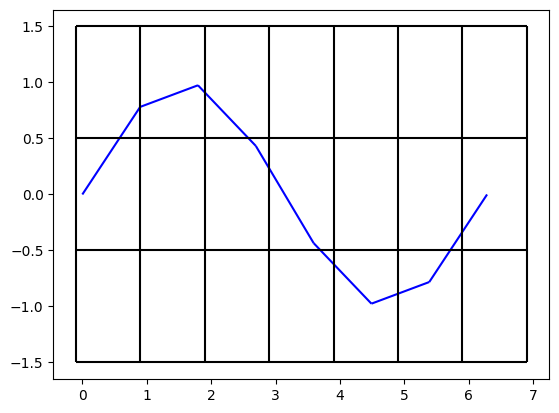

In [9]:
fig, ax = plt.subplots()

mesh1d_input.plot_edges(ax, color="blue")
mesh2d_input.plot_edges(ax, color="black")

Typically if we have 1d and 2d meshes we want to create contacts between them.
All contacts methods expect a node mask, which determines which 1d nodes should be connected.
In our case we want to consider all nodes.

In [10]:
node_mask = np.full(mesh1d_input.node_x.size, True)

We call the `contacts_compute_multiple` method in order to create the contacts.

In [11]:
mk.contacts_compute_multiple(node_mask)

Then, we retrieve the state from the `MeshKernel` instance.

In [12]:
mesh1d_output_0 = mk.mesh1d_get()
mesh2d_output_0 = mk.mesh2d_get()
contacts_output_0 = mk.contacts_get()

We see that there are now contacts between the 1d nodes and the 2d faces.

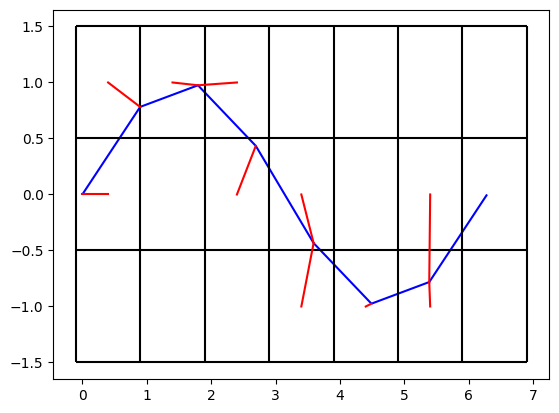

In [13]:
fig, ax = plt.subplots()
mesh1d_output_0.plot_edges(ax, color="blue")
mesh2d_output_0.plot_edges(ax, color="black")
contacts_output_0.plot_edges(ax, mesh1d_output_0, mesh2d_output_0, color="red")